#### Итоговое задание Глазкова Василия по проекту 2 "Разведывательный анализ данных"

### Описание задачи

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.  
***Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.***  
Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

**Описание датасета и переменные которые он содержит**:
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

#### Первичный осмотр данных

In [54]:
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
students = pd.read_csv('data/stud_math.csv')
display(students.head(3))
print('Длина df: ', len(students))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


Длина df:  395


In [56]:
# сделаем расширенный формат вывода для вывода всех столбцов

pd.set_option('display.max_columns', 40)
display(students.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [57]:
# посмотрим общую информацию он нашем датафрейме

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из описания датасета и первичного осмотра видно, что:  
* у нас имеется 30 столбцов (0 - 29), которые включают следующие типы данных: 
  float64(12), int64(1), object(17) 
* столбец 'studytime, granular' - отсутствует в описании 

***
По условию задачи нам требуется **оценить влияние различных параметров на итоговую оценку (score)**.
Поэтому можно удалить из нашего датафрейма записи не содержащие информацию о количестве баллов (по информации полученной выше, столбец score имеет пропуски в данных).
***

In [58]:
students.dropna(subset=['score'], inplace=True)
print('Новая длина df: ', len(students))

Новая длина df:  389


***
Посмотрим и удалим столбцы, в которых перевес любого из признаков слишком существенный.
***

In [59]:
signif_value_share = [col for col in students.columns if students[col].value_counts(
    dropna=False, normalize=True).values[0] > 0.88]

print(signif_value_share, ' - имеют существенное влияние одного из факторов.')

# очищаем датасет
students.drop(signif_value_share, axis=1, inplace=True)

['school', 'higher']  - имеют существенное влияние одного из факторов.


In [60]:
null_cols = [col for col in students.columns if students[col].isnull(
).sum() / students.shape[0] > 0.095]
print(null_cols, ' - имеют более 9.5% пустых значений.')

['Pstatus', 'famsup', 'paid']  - имеют более 9.5% пустых значений.


In [61]:
print(
    f'В датасете {students.isnull().any().sum()} столбцов содержат пустые значения.')

В датасете 25 столбцов содержат пустые значения.


In [62]:
# Посмотрим столбцы с неизменным значением
value_cols = [
    col for col in students.columns if students[col].nunique() <= 1]
print(f'В датасете {len(value_cols)} столбцов с неизменными значениями.')

В датасете 0 столбцов с неизменными значениями.


**Вывод:**

Большинство столбцов содержат не менее 1 пустого значения. Большинство в 'Pstatus', 'famsup', 'paid', но это не критично. Также отсутствуют столбцы с единственным и неизменным значением, которые нужно было бы удалить как неинформативные.



#### Теперь проклассифицируем показатели на количественные, номинативные, порядковые и, отдельно, бинарные.

In [63]:
quantitative = []  # количественные
nominative = []  # номинативные
ordinal = []  # порядковые
binary = []  # бинарные

for column in students.columns:
    # Перечень всех вариантов ответов в столбце
    variables = students[column].unique()
    if len(variables) <= 3:
        datatype = 'binary'  # бинарный, если с учётом NaN их 2-3
        binary.append(column)
    # в остальных случаях для строковых данных - номинативный
    elif students[column].dtype == 'object':
        datatype = 'nominative'
        nominative.append(column)
    elif len(variables) <= 7:  # порядковый, если вариантов ответов не больше 7
        datatype = 'ordinal'
        ordinal.append(column)
    else:
        datatype = 'quantitative'  # в остальных случаях - количественный
        quantitative.append(column)

print('Бинарные переменные: ', len(binary), binary)
print('Порядковые переменные: ', len(ordinal), ordinal)
print('Номинативные переменные: ', len(nominative), nominative)
print('Количественные переменные: ', len(quantitative), quantitative)

Бинарные переменные:  11 ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic']
Порядковые переменные:  10 ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime', 'goout', 'health']
Номинативные переменные:  4 ['Mjob', 'Fjob', 'reason', 'guardian']
Количественные переменные:  3 ['age', 'absences', 'score']


**Вывод**

Большинство переменных имеют либо бинарный (2 значения + NaN), либо порядковый числовой признак (градация до 6 вариантов числовых ответов + NaN). Также присутствуют 4 количественных и 3 номинативных переменных. 

***
#### Теперь рассмотрим количественные переменные.

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Количество баллов')

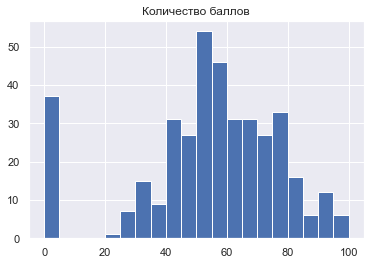

In [64]:
# 1. Количество баллов

sns.set()
display(students.score.describe())
students.score.hist(bins=20)
plt.title('Количество баллов')

**'score'** - наша предсказываемая величина. 

Нетипичных значений (меньше 0 или больше 100) не обнаружено.

Больше 30 учеников получили 0 баллов. Этои значения, возможно, обусловлены техническими ошибками подсчёта баллов, либо чем либо ещё, но может повлиять на корректность результатов исследования. Минимально значимой величиной, исходя из визульного анализа, является 20 баллов.

Поэтому удалим записи, содержащие 0 в значении *'score'*.


In [65]:
students.drop(students[students.score == 0].index, inplace=True)
print('Длина df после очистки: ', len(students))

Длина df после очистки:  352


count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Количество баллов')

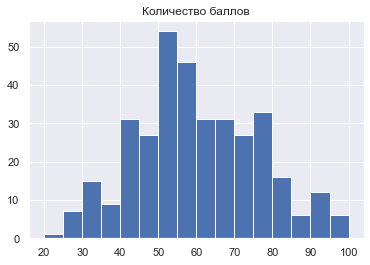

In [66]:
sns.set()
display(students.score.describe())
students.score.hist(bins=16)
plt.title('Количество баллов')

Распределение данных теперь визуально кажется ближе к нормальному с медианой 55 баллов.


In [67]:
# 2. Возраст

students.age.value_counts(dropna=False)

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

Пропусков значений возраста нет. Несмотря на то, что разброс данных (от 15 до 22 лет) соответствует условию задачи, записей студентов в возрасте 20+ всего 5 из всей выборки. Чтобы избежать неверной интерпретации выводов, эти записи будут исключены из анализа.

In [68]:
students.drop(students[students.age >= 20].index, inplace=True)
print('Длина df после очистки: ', len(students))

Длина df после очистки:  347


count    347.000000
mean      16.576369
std        1.166396
min       15.000000
25%       16.000000
50%       17.000000
75%       17.000000
max       19.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Возраст')

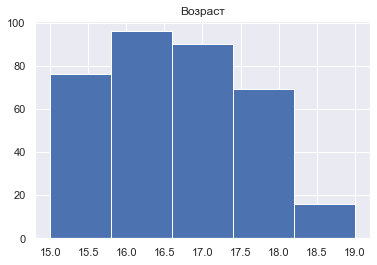

In [69]:
display(students.age.describe())
plt.hist(students['age'], bins=5)
plt.title('Возраст')

Данные распределены относительно равномерно.


Text(0, 0.5, 'Оценка')

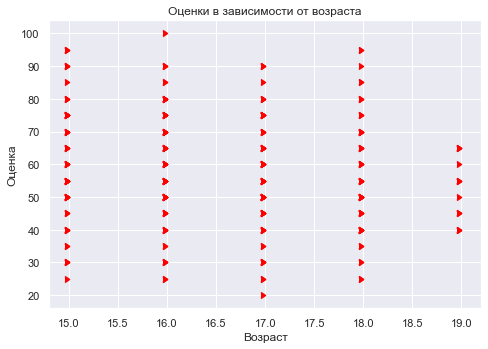

In [70]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=students['age'], y=students['score'], marker=5, color='red')
axes.set_title('Оценки в зависимости от возраста')
axes.set_xlabel('Возраст')
axes.set_ylabel('Оценка')

In [71]:
for k in students.age.value_counts().keys():
    print(k, students[students.age == k].score.median())

16 57.5
17 55.0
15 60.0
18 55.0
19 55.0


Хоть визуально могло показаться, что среди 19-ти летних оценки ниже, медиана у них равна группе 17-ти и 18-ти летних, и общей по датасету = 55.

count    337.000000
mean       7.513353
std       22.244327
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Text(0.5, 1.0, 'Количество пропущенных занятий')

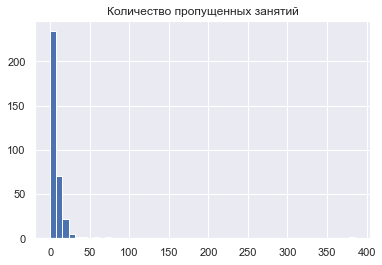

In [72]:
# 3. Количество пропущенных занятий

display(students.absences.describe())
students.absences.hist(bins=50)
plt.title('Количество пропущенных занятий')

Здесь видно, что большинство учеников вообще не пропускало занятий, а медиана - всего 4 пропуска. 

Бросается в глаза как минимум 1 выброс - 385. 
Среднее значение из-за выброса заметно выше, чем медиана (7.5 / 4).

Рассмотрим подробнее.

In [73]:
# оценим границы выбросов
q1 = students.absences.quantile(q=0.25, interpolation='midpoint')
q3 = students.absences.quantile(q=0.75, interpolation='midpoint')
iqr = q3 - q1

"""
k - коэффициент, определяющий границы выбросов. 
Стандартно - это 1.5, но я возьму более обширные границы, чтобы захватить выброс 385
"""
k = 3
print('Q1: {} \nQ3: {} \nIQR: {}\nk*IQR: {}'.format(q1, q3, iqr, k*iqr))

# Далее оценим, какие записи можно считать выбросами
out = []
for row in students.absences:
    if row-q3 > iqr*k or row-q1 < iqr*-k:
        out.append(row)
print(f'Число выбросов: {len(out)}, от {min(out)} до {max(out)}')

# И очистим датафрейм от выбросов в столбце absences
students.drop(students[students.absences.isin(out)].index, inplace=True)
print('Длина df после очистки: ', len(students))

Q1: 2.0 
Q3: 8.0 
IQR: 6.0
k*IQR: 18.0
Число выбросов: 8, от 28.0 до 385.0
Длина df после очистки:  339


count    329.000000
mean       5.550152
std        5.662086
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       26.000000
Name: absences, dtype: float64

Text(0.5, 1.0, 'Количество пропущенных занятий')

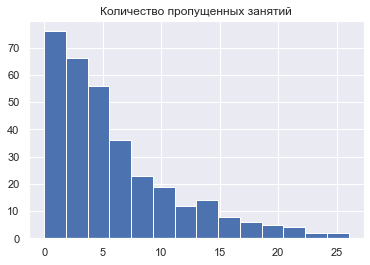

In [74]:
# Повторно посмотрим на очищенный показатель absences
display(students.absences.describe())
plt.hist(students['absences'], bins=14)
plt.title('Количество пропущенных занятий')

После корректировки, распределение стало более правильным. Очевидно равномерное снижение числа пропущенных занятий среди студентов.

Посмотрим распределение оценок  в зависимости от посещаемости.

Text(0, 0.5, 'absences')

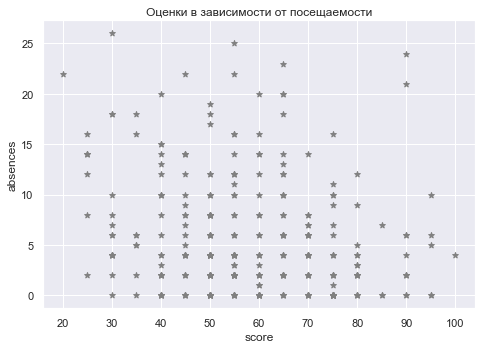

In [75]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=students['score'], y=students['absences'],
             marker='*', color='grey')
axes.set_title('Оценки в зависимости от посещаемости')
axes.set_xlabel('score')
axes.set_ylabel('absences')

Однозначной зависимости не прослеживается


In [76]:
students[quantitative].corr()

,age,absences,score
age,1.000000,0.214597,-0.120940
absences,0.214597,1.000000,-0.207903
score,-0.120940,-0.207903,1.000000


Корелляции по количественным переменным также нет.

***
#### Рассмотрим порядковые переменные


Показатель: Medu


4.0    0.359882
2.0    0.250737
3.0    0.238938
1.0    0.135693
0.0    0.008850
NaN    0.005900
Name: Medu, dtype: float64

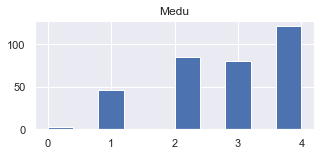


Показатель: Fedu


2.0     0.265487
3.0     0.250737
4.0     0.230088
1.0     0.185841
NaN     0.058997
0.0     0.005900
40.0    0.002950
Name: Fedu, dtype: float64

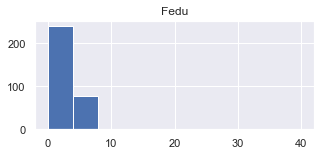


Показатель: traveltime


1.0    0.619469
2.0    0.241888
NaN    0.067847
3.0    0.050147
4.0    0.020649
Name: traveltime, dtype: float64

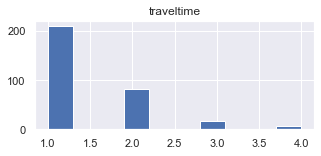


Показатель: studytime


2.0    0.495575
1.0    0.250737
3.0    0.162242
4.0    0.070796
NaN    0.020649
Name: studytime, dtype: float64

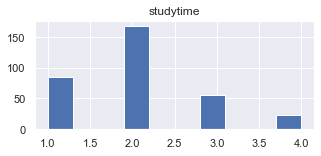


Показатель: failures


0.0    0.790560
1.0    0.103245
NaN    0.056047
2.0    0.026549
3.0    0.023599
Name: failures, dtype: float64

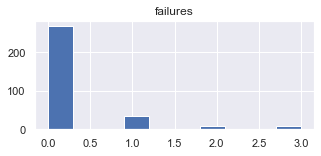


Показатель: studytime, granular


-6.0     0.495575
-3.0     0.250737
-9.0     0.162242
-12.0    0.070796
 NaN     0.020649
Name: studytime, granular, dtype: float64

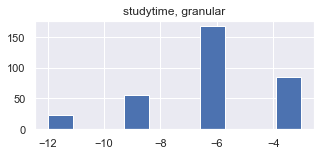


Показатель: famrel


 4.0    0.466077
 5.0    0.241888
 3.0    0.165192
 NaN    0.067847
 2.0    0.038348
 1.0    0.017699
-1.0    0.002950
Name: famrel, dtype: float64

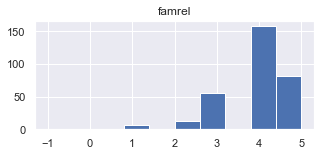


Показатель: freetime


3.0    0.380531
4.0    0.292035
2.0    0.174041
5.0    0.094395
1.0    0.041298
NaN    0.017699
Name: freetime, dtype: float64

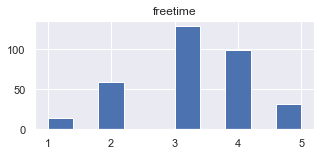


Показатель: goout


3.0    0.330383
2.0    0.268437
4.0    0.209440
5.0    0.123894
1.0    0.050147
NaN    0.017699
Name: goout, dtype: float64

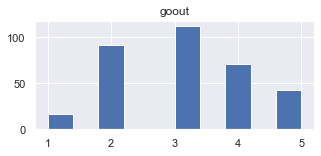


Показатель: health


5.0    0.351032
3.0    0.227139
4.0    0.150442
1.0    0.126844
2.0    0.106195
NaN    0.038348
Name: health, dtype: float64

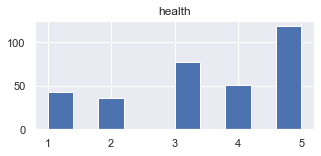

In [77]:
# 1. Рассмотрим процентное распределение вариантов ответов в порядковых переменных

def ordin_prop(factor):
    print(f'\nПоказатель: {factor}')
    proportion = students[factor].value_counts(dropna=False, normalize=True)
    display(proportion)
    # Добавим гистограмму
    figure = plt.subplots(figsize=(5, 2))
    plt.hist(students[factor])
    plt.title(factor)
    plt.show()


# Применим функцию для каждой порядковой переменной
for factor in ordinal:
    ordin_prop(factor)

Учитывая описание специфики полей датасета, а так же процентное распределение вариантов ответов, делаем вывод, что переменные 'Fedu' и 'famrel' содержат выбросы (40 и -1 соответственно). Почистим датасет от этих записей.

In [78]:
students.drop(students[(students.Fedu == 40) | (
    students.famrel == -1)].index, inplace=True)

Также в описании полей отсутствуют сведения о переменной "studytime, granular", значения которой к тому же отрицательны и неинтерпретируемы. Проверим взаимосвязь значений этого параметра со "studytime".

In [79]:
students[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


Понятно, что параметр "studytime, granular" для анализа нам неинтересен. Удалим его из набора данных.

In [80]:
students.drop(['studytime, granular'], axis=1, inplace=True)

# обновление списка полей порядковых переменных
ordinal.remove('studytime, granular')

print('Длина df после очистки: ', len(students))

Длина df после очистки:  337



Показатель: Medu


4.0    0.362018
2.0    0.246291
3.0    0.240356
1.0    0.136499
0.0    0.008902
NaN    0.005935
Name: Medu, dtype: float64

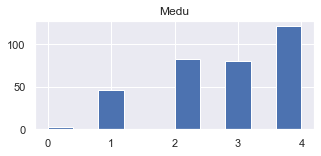


Показатель: Fedu


2.0    0.264095
3.0    0.252226
4.0    0.231454
1.0    0.186944
NaN    0.059347
0.0    0.005935
Name: Fedu, dtype: float64

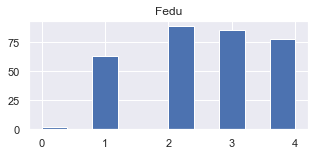


Показатель: traveltime


1.0    0.620178
2.0    0.243323
NaN    0.068249
3.0    0.047478
4.0    0.020772
Name: traveltime, dtype: float64

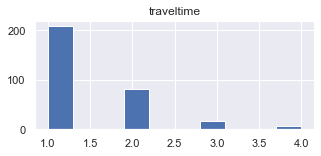


Показатель: studytime


2.0    0.498516
1.0    0.249258
3.0    0.160237
4.0    0.071217
NaN    0.020772
Name: studytime, dtype: float64

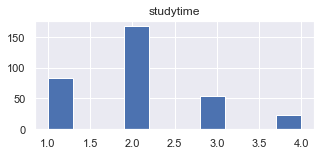


Показатель: failures


0.0    0.792285
1.0    0.103858
NaN    0.056380
2.0    0.023739
3.0    0.023739
Name: failures, dtype: float64

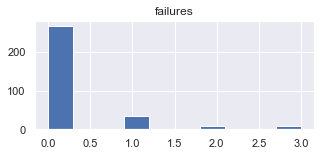


Показатель: famrel


4.0    0.468843
5.0    0.240356
3.0    0.166172
NaN    0.068249
2.0    0.038576
1.0    0.017804
Name: famrel, dtype: float64

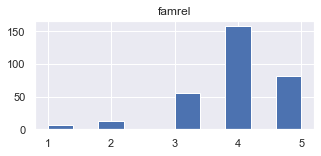


Показатель: freetime


3.0    0.382789
4.0    0.293769
2.0    0.169139
5.0    0.094955
1.0    0.041543
NaN    0.017804
Name: freetime, dtype: float64

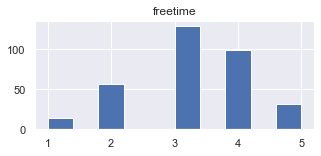


Показатель: goout


3.0    0.332344
2.0    0.264095
4.0    0.210682
5.0    0.124629
1.0    0.050445
NaN    0.017804
Name: goout, dtype: float64

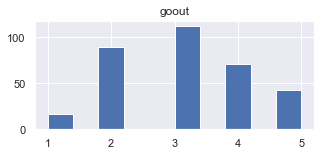


Показатель: health


5.0    0.350148
3.0    0.228487
4.0    0.148368
1.0    0.127596
2.0    0.106825
NaN    0.038576
Name: health, dtype: float64

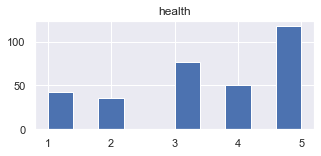

In [81]:
# Посмотрим на нормированное распределение ответов повторно, после очистки.
for factor in ordinal:
    ordin_prop(factor)

**Выводы:**
* В большинстве случаев образование матери - высшее, в то время как образование отца распределено достаточно равномерно.
* Время в пути до школы чаще всего < 2 часов, пропущено много данных.
* Половина учеников тратит на учёбу вне школы 2-5 часов.
* Большинство не имеют внеучебных неудач, 10% имеют 1. Довольно много пропусков в данных.
* Семейные отношения чаще всего хорошие, но здесь довольно много пропусков в данных.
* Свободное время распределено нормально.
* Тех, кто чувствует себя хорошо, и плохо, либо очень плохо - относительно поровну.

In [82]:
# уберем неинформативные порядковые переменные
not_informative = ['traveltime', 'failures', 'famrel', 'goout']
ordinal = [x for x in ordinal if x not in not_informative]

Проведём корреляционный анализ порядковых числовых переменных.

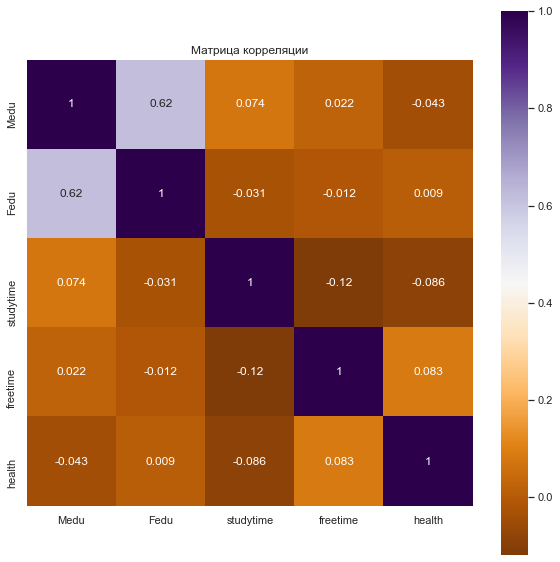

In [83]:
correlation = students[ordinal].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='PuOr')
plt.title('Матрица корреляции')
plt.show()

Fedu и Medu между собой коррелируют (k > 0.4). 

Оставляем из них Medu, т.к. у Fedu доля пустых значений выше, чем доля вещественного значения "0" (5.9% против 0.6%).
***

In [84]:
ordinal.remove('Fedu')
ordinal

['Medu', 'studytime', 'freetime', 'health']

#### Рассмотрим номинативные переменные.


In [85]:
for col in nominative:
    display(students[col].value_counts(dropna=False))

other       110
services     83
teacher      50
at_home      48
health       29
NaN          17
Name: Mjob, dtype: int64

other       169
services     82
NaN          32
teacher      25
health       15
at_home      14
Name: Fjob, dtype: int64

course        115
reputation     92
home           84
other          31
NaN            15
Name: reason, dtype: int64

mother    217
father     77
NaN        26
other      17
Name: guardian, dtype: int64

Работa родителей у большинства - other, что естественно. 

Причины выбора школы распределены почти равномерно. Но больше - из-за программы.

Опекун в 2/3 случаев - мать.

In [86]:
# Посмотрим, как распределены оценки, в зависимости от вариантов ответов среди номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

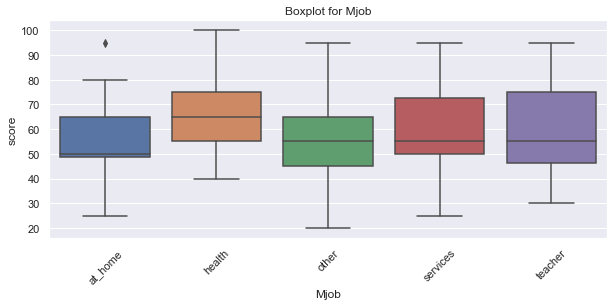

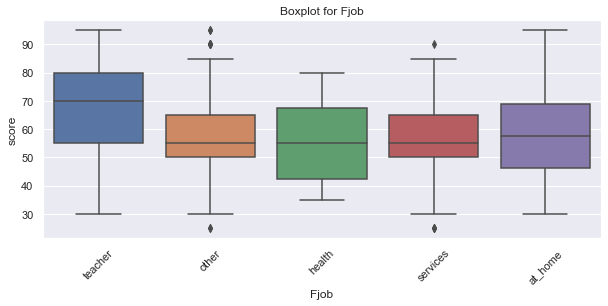

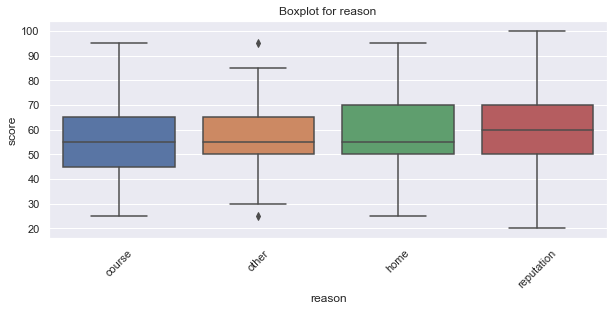

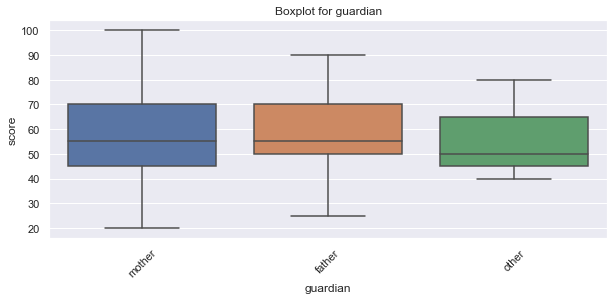

In [87]:
for factor in nominative:
    get_boxplot(factor)

In [88]:
# Проверим статистическую значимость на уровне 10%
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [89]:
for factor in nominative:
    get_stat_dif(factor)

Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob


In [90]:
# Оставляем только эти значимые параметры
nominat = ['Mjob', 'Fjob']

#### Рассмотрим бинарные переменные.


In [91]:
for factor in binary:
    print(f'Показатель: {factor}')
    print(students[factor].value_counts(dropna=False, normalize=True), '\n')

Показатель: sex
F    0.513353
M    0.486647
Name: sex, dtype: float64 

Показатель: address
U      0.753709
R      0.207715
NaN    0.038576
Name: address, dtype: float64 

Показатель: famsize
GT3    0.640950
LE3    0.290801
NaN    0.068249
Name: famsize, dtype: float64 

Показатель: Pstatus
T      0.801187
NaN    0.109792
A      0.089021
Name: Pstatus, dtype: float64 

Показатель: schoolsup
no     0.839763
yes    0.136499
NaN    0.023739
Name: schoolsup, dtype: float64 

Показатель: famsup
yes    0.557864
no     0.341246
NaN    0.100890
Name: famsup, dtype: float64 

Показатель: paid
no     0.480712
yes    0.412463
NaN    0.106825
Name: paid, dtype: float64 

Показатель: activities
yes    0.495549
no     0.468843
NaN    0.035608
Name: activities, dtype: float64 

Показатель: nursery
yes    0.777448
no     0.186944
NaN    0.035608
Name: nursery, dtype: float64 

Показатель: internet
yes    0.777448
no     0.136499
NaN    0.086053
Name: internet, dtype: float64 

Показатель: romantic
no 

Отберём показатели, в которых присутствуют варианты yes/no.


In [92]:
bin_bool = []  # список для yes/no
bin_other = []  # список для остальных

for p in binary:
    if 'yes' in set(students[p]):
        bin_bool.append(p)
    else:
        bin_other.append(p)
print('Содержат логический признак: ', bin_bool)
print('Не содержат логический признак: ', bin_other)

Содержат логический признак:  ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic']
Не содержат логический признак:  ['sex', 'address', 'famsize', 'Pstatus']


Преобразуем данные с логическим признаком на 1 и 0.

In [93]:
def bool_code(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0
    else:
        return None


for factor in bin_bool:
    students[factor] = students[factor].apply(bool_code)

display(students[bin_bool].head(3))

,schoolsup,famsup,paid,activities,nursery,internet,romantic
0,1.0,0.0,0.0,0.0,1.0,NaN,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,NaN,0.0,1.0,1.0,NaN


Посмотрим на матрицу корреляций данных признаков.

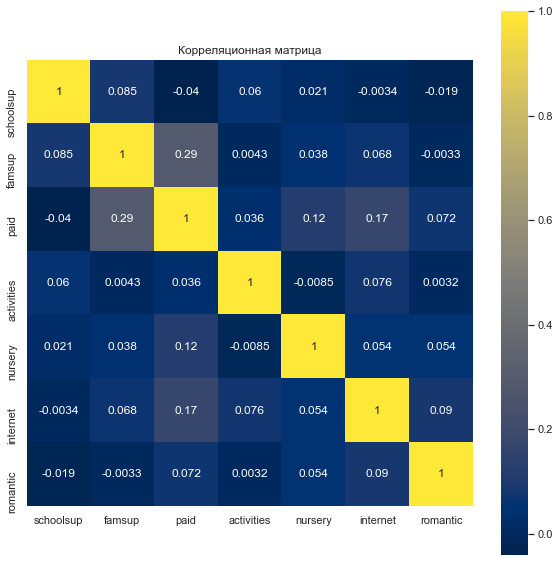

In [94]:
correlation = students[bin_bool].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cividis')
plt.title('Корреляционная матрица')
plt.show()

Явной корреляции бинарных признаков не обнаружено. Максимальный k=0.29 (< 0.4) у 'famsup' и 'paid'. По своему смыслу эти параметры близки: "Семейная образовательная поддержка" и "Дополнительные платные занятия по математике".

Так как "paid" присутствует в ТОП-3 параметров с наибольшим числом пустых значений, удалим его.


In [95]:
binary.remove('paid')
bin_bool.remove('paid')

Посмотрим, как распределена выручка по бинарным переменным.

In [96]:
def binary_review(factor):
    #fig, ax = plt.subplots(figsize = (6, 4))
    sns.catplot(x=factor, y='score', data=students,
                height=3, aspect=2, palette="husl")
    plt.title('Score for ' + factor)
    plt.show()

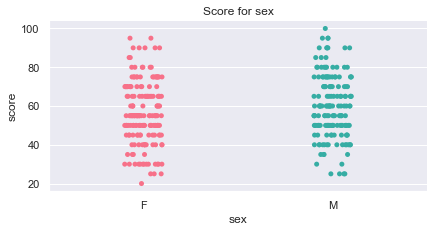

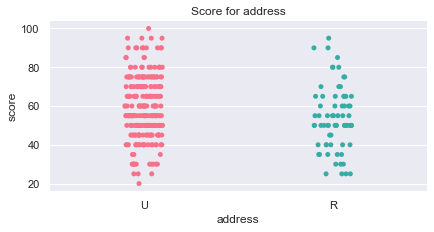

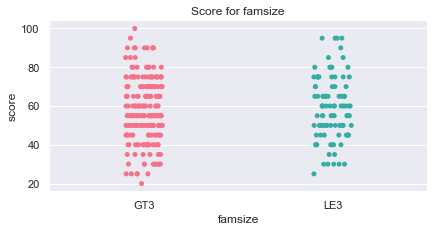

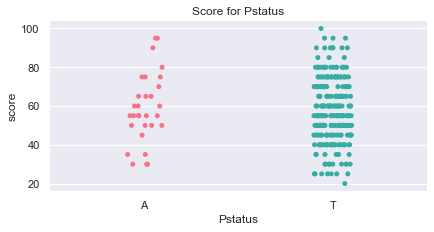

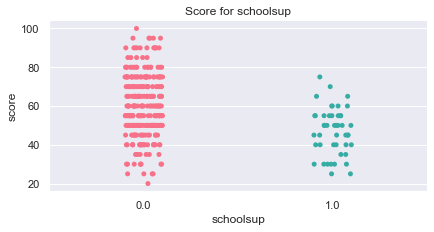

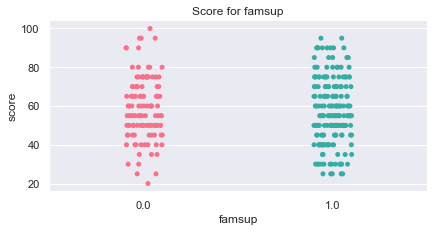

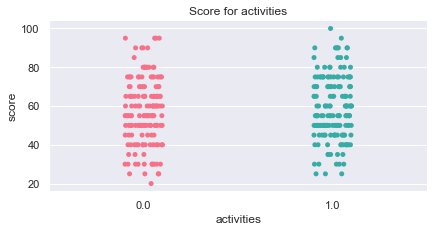

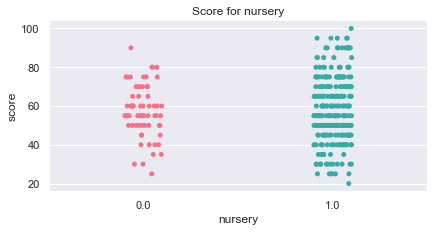

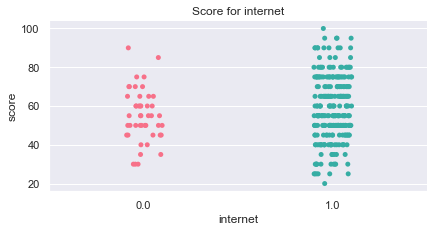

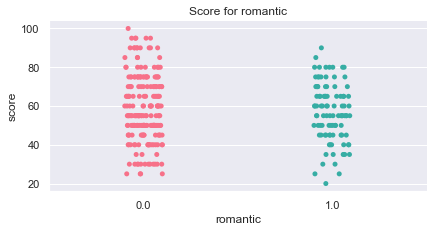

In [97]:
for factor in binary:
    binary_review(factor)

***
Интересно, что среди тех студентов, кто пользовался школьной дополнительной образовательной поддержкой (schoolsup = 1), результаты оказались значительно ниже, чем у другой группы. Также, семейная образовательная поддержка (famsup = 1) не улучшила результаты.

**Выводы:**
1. Лучше с экзаменом справились:
    * Мальчики
    * Живущие в городе
    * Без дополнительной образовательной поддержки
    * С дополнительными внеучебными занятиями
    * Не состоящие в отношениях


2. Неинформативные показатели:
    * Размер семьи
    * Статус совместного жилья родителей
    * Семейная образовательная поддержка
    * Посещение дет.сада
    * Наличие интернета
***

In [98]:
# Проверка предположений
for factor in binary:
    get_stat_dif(factor)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


In [99]:
# Уберём неинформативные параметры из набора бинарных переменных
not_inf = ['famsize', 'Pstatus', 'famsup', 'activities', 'nursery', 'internet']
binary = [x for x in binary if x not in not_inf]
binary

['sex', 'address', 'schoolsup', 'romantic']

***
Какие в итоге параметры остались в датасете как влияющие на результат.
***

In [100]:
final_list = quantitative + nominative + ordinal + binary
final_df = students[final_list]
final_df.head()

,age,absences,score,Mjob,Fjob,reason,guardian,Medu,studytime,freetime,health,sex,address,schoolsup,romantic
0,18,6.0,30.0,at_home,teacher,course,mother,4.0,2.0,3.0,3.0,F,U,1.0,0.0
1,17,4.0,30.0,at_home,other,course,father,1.0,2.0,3.0,3.0,F,U,0.0,0.0
2,15,10.0,50.0,at_home,other,other,mother,1.0,2.0,3.0,3.0,F,U,1.0,NaN
3,15,2.0,75.0,health,NaN,home,mother,4.0,3.0,2.0,5.0,F,U,0.0,1.0
4,16,4.0,50.0,other,other,home,father,3.0,2.0,3.0,5.0,F,U,0.0,0.0


In [101]:
c = 0
for index, row in final_df.iterrows():
    if row.isnull().sum() > 0:
        c += 1
print('Число строк с хотя бы 1 пустым значением: {}. Их доля от общей длины df ({}): {}'.format(
    c, len(final_df), round(c/len(final_df), 2)))

Число строк с хотя бы 1 пустым значением: 140. Их доля от общей длины df (337): 0.42


### Выводы

В результате EDA для анализа влияния критериев датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

* В датасете остались пустые значения. На данном этапе сложно сказать, насколько это будет значимо. Если бы мы очистили датасет от всех записей, содержащих хотя бы 1 пустое значение, то из 337 строк осталось бы 228, и качество выборки заметно бы ухудшилось. 
* полученные результаты экзаменов по математике во многом зависели от самых разных факторов, таких, как работа матери, количество свободного времени или даже наличия романтических отношений. 
* Для более полного понимания взаимосвязей разных параметров необходимо провести факторный и кластерный анализ данных, а так же провести кроссчекинг факторов. Например, хоть посещаемость и не оказывает прямого влияния на сумму баллов, я сомневаюсь, что это случайный показатель. Возможно, в сопоставлении с другими порядковыми или номинативными переменными удастся найти взаимосвязь. То же касается и поло-возрастных групп. 
* положительная корреляция по парамметру f_edu говорит о том, что чем выше образование отца тем выше балл.
* положительная корреляция по парамметру m_edu говорит о том, что чем выше образование матери тем выше балл.
***